In [167]:
%matplotlib inline
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
data = pd.read_csv('./diabetic_data.csv')
data1 = pd.read_csv('./IDs_mapping.csv')

In [130]:
data.shape

(101766, 50)

In [9]:
data1.shape

(67, 2)

In [76]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [11]:
data1.columns

Index(['admission_type_id', 'description'], dtype='object')

In [114]:
data2 = data1[0:8]
data3 = data1[10:40]
data4 = data1[42:67]
data3 = data3.rename(index=str, columns={"admission_type_id":"discharge_disposition_id"})
data3
data4 = data4.rename(index=str, columns={"admission_type_id":"admission_source_id"})
data3

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [73]:
for i in range(0,67):
    if type(data1['admission_type_id'][i]) == str:
        if len(data1['admission_type_id'][i]) > 2:
            print(i)


9
41


KeyError: 67

In [120]:

data2.admission_type_id = data2.admission_type_id.astype(int)
data2.dtypes
data3.discharge_disposition_id = data3.discharge_disposition_id.astype(int)
data4.admission_source_id = data4.admission_source_id.astype(int)
data4.dtypes

/Users/heqianli/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


admission_source_id     int64
description            object
dtype: object

In [85]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [14]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [27]:
data1.head

<bound method NDFrame.head of            admission_type_id  \
0                          1   
1                          2   
2                          3   
3                          4   
4                          5   
5                          6   
6                          7   
7                          8   
8                        NaN   
9   discharge_disposition_id   
10                         1   
11                         2   
12                         3   
13                         4   
14                         5   
15                         6   
16                         7   
17                         8   
18                         9   
19                        10   
20                        11   
21                        12   
22                        13   
23                        14   
24                        15   
25                        16   
26                        17   
27                        18   
28                        19   
29        

In [19]:
data['readmitted'].tail

<bound method NDFrame.tail of 0          NO
1         >30
2          NO
3          NO
4          NO
5         >30
6          NO
7         >30
8          NO
9          NO
10        >30
11        <30
12        <30
13         NO
14        >30
15         NO
16        <30
17         NO
18        >30
19         NO
20         NO
21         NO
22         NO
23        >30
24         NO
25         NO
26         NO
27        >30
28        >30
29        >30
         ... 
101736    >30
101737     NO
101738     NO
101739     NO
101740     NO
101741     NO
101742     NO
101743     NO
101744     NO
101745     NO
101746    <30
101747    >30
101748    >30
101749     NO
101750    <30
101751     NO
101752     NO
101753     NO
101754    >30
101755    >30
101756    >30
101757     NO
101758     NO
101759     NO
101760    >30
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object>

In [148]:
new_data = new_data.replace('?', np.nan)

In [83]:
total = data.isna().sum().sort_values(ascending=False)


weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
num_procedures                  0
max_glu_serum                   0
number_diagnoses                0
number_inpatient                0
number_emergency                0
number_outpatient               0
num_medications                 0
readmitted                      0
num_lab_procedures              0
diabetesMed                     0
time_in_hospital                0
admission_source_id             0
discharge_disposition_id        0
admission_type_id               0
age                             0
gender                          0
patient_nbr                     0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
change                          0
metformin-piog

In [138]:
new_data = pd.merge(data, data2,on = 'admission_type_id',how ='left')
new_data = new_data.rename(index=str, columns={"description":"admission_type_description"})
new_data = pd.merge(new_data,data3, on = 'discharge_disposition_id', how = 'left')
new_data = new_data.rename(index=str, columns={"description":"discharge_disposition_description"})
new_data = pd.merge(new_data,data4, on = 'admission_source_id', how = 'left')
new_data = new_data.rename(index=str, columns={"description":"admission_source_description"})
new_data


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description,discharge_disposition_description,admission_source_description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,No,No,No,No,Yes,>30,Urgent,Discharged to home,Clinic Referral
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,No,No,No,Ch,Yes,NO,Elective,Discharged to home,Clinic Referral
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,Yes,>30,Emergency,Discharged to home,Emergency Room
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,No,No,No,Ch,Yes,NO,Urgent,Discharged to home,Transfer from a hospital
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,No,No,No,Ch,Yes,NO,Elective,Discharged/transferred to SNF,Transfer from a hospital


In [137]:
new_data.shape

(101766, 53)

In [126]:
data2.head

<bound method NDFrame.head of    admission_type_id    description
0                  1      Emergency
1                  2         Urgent
2                  3       Elective
3                  4        Newborn
4                  5  Not Available
5                  6            NaN
6                  7  Trauma Center
7                  8     Not Mapped>

In [154]:
total_new = new_data.isna().sum().sort_values(ascending=False)
total_new = total_new.loc[total_new.values > 0]
total_new = total_new/len(new_data.index)
total_new

weight                               0.968585
medical_specialty                    0.490822
payer_code                           0.395574
admission_source_description         0.066633
admission_type_description           0.051992
discharge_disposition_description    0.036269
race                                 0.022336
diag_3                               0.013983
diag_2                               0.003518
diag_1                               0.000206
dtype: float64

In [139]:
new_data['readmitin30days'] = np.where(new_data['readmitted'] == '<30', 1, 0)

In [157]:
new_data.shape

(101766, 54)

In [144]:
len(new_data.patient_nbr.unique())/len(new_data.index)

0.7027690977340173

In [155]:
(new_data.weight.value_counts()/len(new_data.index))

[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: weight, dtype: float64

In [190]:
new_data['vistits'] = new_data.groupby('patient_nbr')['patient_nbr'].transform('count')
new_data['vistits'].describe()
new_data['vistits'].value_counts()

25

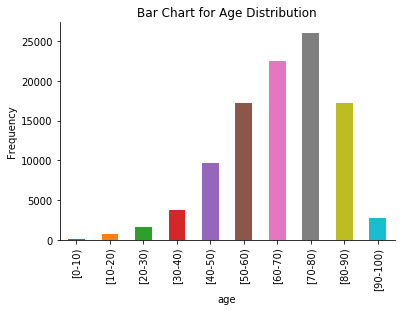

In [168]:

age_group = new_data.groupby(['age']).size()
age_group.plot(kind = 'bar')
sns.despine()
plt.ylabel('Frequency')
plt.title('Bar Chart for Age Distribution')
plt.show()

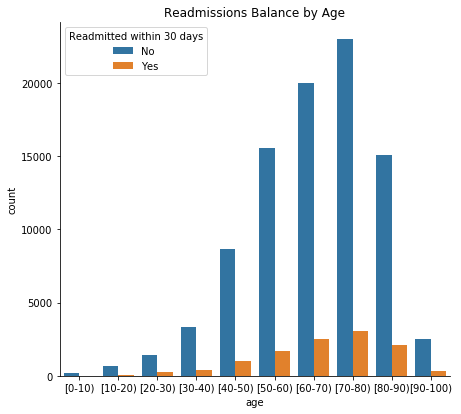

In [170]:
age = new_data.age.unique()
age.sort()
age_sort = np.array(age).tolist()
compare = sns.countplot(x = 'age', hue = 'readmitin30days', data = new_data, order = age_sort)
sns.despine()
compare.figure.set_size_inches(7, 6.5)
compare.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
compare.axes.set_title('Readmissions Balance by Age')
plt.show()

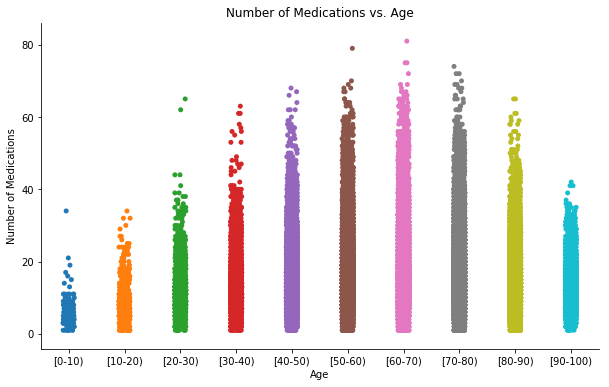

In [171]:
age_sort = new_data.sort_values(by = 'age')
graph = sns.stripplot(x = "age", y = "num_medications", data = age_sort)
sns.despine()
graph.figure.set_size_inches(10, 6)
graph.set_xlabel('Age')
graph.set_ylabel('Number of Medications')
graph.axes.set_title('Number of Medications vs. Age')
plt.show()

In [179]:
data['diag_1'].value_counts()
data['diag_2'].value_counts()
data['diag_3'].value_counts()

428       6862
414       6581
786       4016
410       3614
486       3508
427       2766
491       2275
715       2151
682       2042
434       2028
780       2019
996       1967
276       1889
38        1688
250.8     1680
599       1595
584       1520
V57       1207
250.6     1183
518       1115
820       1082
577       1057
493       1056
435       1016
562        989
574        965
296        896
560        876
250.7      871
250.13     851
          ... 
988          1
471          1
373          1
957          1
870          1
791          1
906          1
994          1
133          1
955          1
219          1
523          1
375          1
690          1
114          1
366          1
57           1
691          1
V25          1
97           1
704          1
827          1
84           1
E909         1
391          1
216          1
V60          1
903          1
389          1
939          1
Name: diag_1, Length: 717, dtype: int64

In [176]:
total_new

weight                               0.968585
medical_specialty                    0.490822
payer_code                           0.395574
admission_source_description         0.066633
admission_type_description           0.051992
discharge_disposition_description    0.036269
race                                 0.022336
diag_3                               0.013983
diag_2                               0.003518
diag_1                               0.000206
dtype: float64

In [186]:
new_data['admission_source_description'].value_counts()
#new_data['admission_type_description'].value_counts()
new_data['discharge_disposition_description'].value_counts()

Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1993
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1184
Not Mapped                                                                                                     989
Discharged/transferred to ICF                                                   

In [219]:
new_data['diag_1'].value_counts()
feature = ['diag_1','diag_2','diag_3']
for i in feature:
    new_data[i] = new_data[i].fillna('0')
def detection(v):
    if v[0]== "V" or v[0] == 'E':
        v = '9999'
        return v
    else:
        return v
for e in feature:
    for i in new_data[e].index:
        new_data[e].at[i] = detection(new_data[e].at[i])

    
new_data.diag_1.value_counts()
new_data.diag_2.value_counts()
#total_new = new_data.isna().sum().sort_values(ascending=False)
#total_new
    
#d1 = pd.DataFrame(new_data.diag_1.apply(lambda v: first_letter(v)), dtype = 'float')
#d2 = pd.DataFrame(new_data.diag_1.apply(lambda v: first_letter))


428       6862
414       6581
786       4016
410       3614
486       3508
427       2766
491       2275
715       2151
682       2042
434       2028
780       2019
996       1967
276       1889
38        1688
250.8     1680
9999      1645
599       1595
584       1520
250.6     1183
518       1115
820       1082
577       1057
493       1056
435       1016
562        989
574        965
296        896
560        876
250.7      871
250.13     851
          ... 
145          1
838          1
834          1
217          1
885          1
372          1
895          1
299          1
314          1
982          1
471          1
870          1
318          1
143          1
61           1
791          1
804          1
911          1
837          1
523          1
976          1
994          1
842          1
939          1
412          1
919          1
98           1
684          1
325          1
373          1
Name: diag_1, Length: 699, dtype: int64

In [223]:
new_data.diag_3.value_counts()
new_data.diag_1 = new_data.diag_1.astype(float)
new_data.diag_2 = new_data.diag_2.astype(float)
new_data.diag_3 = new_data.diag_3.astype(float)
new_data.diag_1.dtypes

dtype('float64')

In [229]:
def catagory(v):
    if 0.0 <= v < 1.0:
        return 'No Diagnosis'
    elif 1.0<= v < 140.0:
        return 'infectious and parasitic diseases'
    elif 140.0 <= v < 240.0:
        return 'neoplasms'
    elif 240.0 <= v < 280.0:
        return 'endocrine, nutritional and metabolic diseases, and immunity disorders'
    elif 280.0 <= v < 290.0:
        return 'diseases of the blood and blood-forming organs'
    elif 290.0 <= v < 320.0:
        return 'mental disorders'
    elif 320.0 <= v < 390.0:
        return 'diseases of the nervous system and sense organs'
    elif 390.0 <= v < 460.0:
        return 'diseases of the circulatory system'
    elif 460.0 <= v < 520.0:
        return 'diseases of the respiratory system'
    elif 520.0 <= v < 580.0:
        return 'diseases of the digestive system'
    elif 580.0 <= v < 630.0:
        return 'diseases of the genitourinary system'
    elif 630.0 <= v < 680.0:
        return 'complications of pregnancy, childbirth, and the puerperium'
    elif 680.0 <= v < 710.0:
        return 'diseases of the skin and subcutaneous tissue'
    elif 710.0 <= v < 740.0:
        return 'diseases of the musculoskeletal system and connective tissue'
    elif 740.0 <= v < 760.0:
        return 'congenital anomalies'
    elif 760.0 <= v < 780.0:
        return 'certain conditions originating in the perinatal period'
    elif 780.0 <= v < 800.0:
        return 'symptoms, signs, and ill-defined conditions'
    elif 800.0 <= v < 999.0:
        return 'injury and poisoning'
    else:
        return 'external causes of injury and supplemental classification'

new_data['f_diag'] = new_data.diag_1.apply(lambda v: catagory(v))
new_data['s_diag'] = new_data.diag_2.apply(lambda v: catagory(v))
new_data['t_diag'] = new_data.diag_3.apply(lambda v: catagory(v))
new_data['f_diag'].head()

0    endocrine, nutritional and metabolic diseases,...
1    endocrine, nutritional and metabolic diseases,...
2    complications of pregnancy, childbirth, and th...
3                    infectious and parasitic diseases
4                                            neoplasms
Name: f_diag, dtype: object

In [230]:
new_data['diag_1'].head()

0    250.83
1    276.00
2    648.00
3      8.00
4    197.00
Name: diag_1, dtype: float64

In [237]:
new_data['f_diag'].describe()

count                                 101766
unique                                    18
top       diseases of the circulatory system
freq                                   30336
Name: f_diag, dtype: object